## Data Pre-processing

In [1]:
import os
import glob
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
# Defines path to csv files
path = "Dataset//store-sales-time-series-forecasting//"

#### Section 1 : Reading the files from the dataset

In [3]:
# reading csv files
csv1 = pd.read_csv(path + 'train.csv', index_col=False)
# print(csv1)
csv2 = pd.read_csv(path + 'transactions.csv', index_col=False)
# print(csv2)
csv3 = pd.read_csv(path + 'stores.csv', index_col=False)
# print(csv3)
csv4 = pd.read_csv(path + 'oil.csv', index_col=False)
# print(csv4)
csv5 = pd.read_csv(path + 'holidays_events.csv', index_col=False)
# print(csv5)

#### Section 2 : Merging the csv files 

In [4]:
# reading two csv files
data1 = pd.read_csv(path + 'train.csv', index_col=False)
data2 = pd.read_csv(path + 'transactions.csv', index_col=False)
  
# using merge function by setting how='inner'
output1 = pd.merge(data1, data2,
                   on=['date','store_nbr'], 
                   how='inner')
  
# displaying result
print(output1)
#Saving our combined csv data as a new file
output1.to_csv(path + 'combine.csv', index=False)

              id        date  store_nbr                      family     sales  \
0            561  2013-01-01         25                  AUTOMOTIVE     0.000   
1            562  2013-01-01         25                   BABY CARE     0.000   
2            563  2013-01-01         25                      BEAUTY     2.000   
3            564  2013-01-01         25                   BEVERAGES   810.000   
4            565  2013-01-01         25                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
2755099  3000883  2017-08-15          9                     POULTRY   438.133   
2755100  3000884  2017-08-15          9              PREPARED FOODS   154.553   
2755101  3000885  2017-08-15          9                     PRODUCE  2419.729   
2755102  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
2755103  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  trans

In [5]:
# reading two csv files
data1 = pd.read_csv(path + 'combine.csv', index_col=False)
data2 = pd.read_csv(path + 'oil.csv', index_col=False)
  
# using merge function by setting how='inner'
output1 = pd.merge(data1, data2, 
                   on='date',
                   how='inner')
  
# displaying result
print(output1)
#Saving our combined csv data as a new file
output1.to_csv(path + 'combine1.csv', index=False)

              id        date  store_nbr                      family     sales  \
0            561  2013-01-01         25                  AUTOMOTIVE     0.000   
1            562  2013-01-01         25                   BABY CARE     0.000   
2            563  2013-01-01         25                      BEAUTY     2.000   
3            564  2013-01-01         25                   BEVERAGES   810.000   
4            565  2013-01-01         25                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
1968478  3000883  2017-08-15          9                     POULTRY   438.133   
1968479  3000884  2017-08-15          9              PREPARED FOODS   154.553   
1968480  3000885  2017-08-15          9                     PRODUCE  2419.729   
1968481  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
1968482  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  trans

In [7]:
# reading two csv files
data1 = pd.read_csv(path + 'combine1.csv', index_col=False)
data2 = pd.read_csv(path + 'stores.csv', index_col=False)
  
# using merge function by setting how='inner'
output2 = pd.merge(data1, data2, 
                   on='store_nbr', 
                   how='inner')
  
# displaying result
print(output2)
#Saving our combined csv data as a new file
output2.to_csv(path + 'combine2.csv', index=False)

              id        date  store_nbr                      family     sales  \
0            561  2013-01-01         25                  AUTOMOTIVE     0.000   
1            562  2013-01-01         25                   BABY CARE     0.000   
2            563  2013-01-01         25                      BEAUTY     2.000   
3            564  2013-01-01         25                   BEVERAGES   810.000   
4            565  2013-01-01         25                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
1968478  3000685  2017-08-15         52                     POULTRY   397.340   
1968479  3000686  2017-08-15         52              PREPARED FOODS   104.418   
1968480  3000687  2017-08-15         52                     PRODUCE  3803.368   
1968481  3000688  2017-08-15         52  SCHOOL AND OFFICE SUPPLIES    17.000   
1968482  3000689  2017-08-15         52                     SEAFOOD     7.000   

         onpromotion  trans

In [8]:
# reading two csv files
data1 = pd.read_csv(path + 'combine2.csv', index_col=False)
data2 = pd.read_csv(path + 'holidays_events.csv', index_col=False)
  
# using merge function by setting how='inner'
output3 = pd.merge(data1, data2, 
                   on='date', 
                   how='inner')
  
# displaying result
print(output3)
#Saving our combined csv data as a new file
output3.to_csv(path + 'combine3.csv', index=False)

              id        date  store_nbr                      family     sales  \
0            561  2013-01-01         25                  AUTOMOTIVE     0.000   
1            562  2013-01-01         25                   BABY CARE     0.000   
2            563  2013-01-01         25                      BEAUTY     2.000   
3            564  2013-01-01         25                   BEVERAGES   810.000   
4            565  2013-01-01         25                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
1968478  3000685  2017-08-15         52                     POULTRY   397.340   
1968479  3000686  2017-08-15         52              PREPARED FOODS   104.418   
1968480  3000687  2017-08-15         52                     PRODUCE  3803.368   
1968481  3000688  2017-08-15         52  SCHOOL AND OFFICE SUPPLIES    17.000   
1968482  3000689  2017-08-15         52                     SEAFOOD     7.000   

         onpromotion  trans

##### Dropping the "Description" column as we won't be using it later.

In [10]:
# reading two csv files
df = pd.read_csv(path + 'combine3.csv', index_col=False)
#Selecting the "description" column and axis=1 as we are delecting the column
final = df.drop(columns='description',axis=1)
# displaying result
print(final)
#Saving our combined csv data as a new file
final.to_csv(path + 'final.csv', index=False)

             id        date  store_nbr                      family      sales  \
0           561  2013-01-01         25                  AUTOMOTIVE    0.00000   
1           562  2013-01-01         25                   BABY CARE    0.00000   
2           563  2013-01-01         25                      BEAUTY    2.00000   
3           564  2013-01-01         25                   BEVERAGES  810.00000   
4           565  2013-01-01         25                       BOOKS    0.00000   
...         ...         ...        ...                         ...        ...   
322042  2445394  2016-10-07         22                     POULTRY  253.38101   
322043  2445395  2016-10-07         22              PREPARED FOODS   43.00000   
322044  2445396  2016-10-07         22                     PRODUCE  281.20200   
322045  2445397  2016-10-07         22  SCHOOL AND OFFICE SUPPLIES    0.00000   
322046  2445398  2016-10-07         22                     SEAFOOD    4.00000   

        onpromotion  transa

#### Section 3 : Replacing the empty/blank values with NULL

In [11]:
# Reading csv files
data1 = pd.read_csv(path + 'final.csv', index_col=False)
df = pd.DataFrame(data1)

#Replacing the blank/empty value with NULL
df2=df.fillna("NULL")

#Saving the output where we replace blank/empty values with NULL into a new file
df2.to_csv(path + 'final1.csv', index=False)
df2.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,city,state,str_type,cluster,type,locale,locale_name,transferred
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,NULL,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False
1,562,2013-01-01,25,BABY CARE,0.0,0,770,NULL,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False
2,563,2013-01-01,25,BEAUTY,2.0,0,770,NULL,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,NULL,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False
4,565,2013-01-01,25,BOOKS,0.0,0,770,NULL,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,False


#### Section 4 : Initial inspection of the dataset using Pandas profiling

In [12]:
profile = ProfileReport(df2, title="Pandas Profiling Report", minimal=True)

In [13]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##### Relationships : Here the net sales are dependant on individual csv so examining all the relationship

Text(0, 0.5, 'Crude Oil')

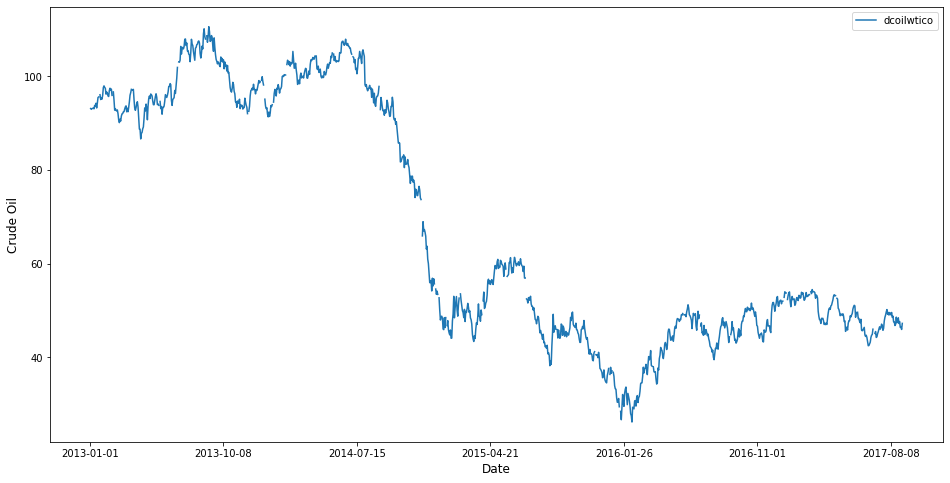

In [16]:
#Reading the csv for examining the Crude oil prices variation over time
data_oil = pd.read_csv(path+'oil.csv')
#Plotting the graph for oil prices variation
ax = data_oil.set_index('date').plot(figsize = (16, 8))
ax.set_xlabel('Date', fontsize = 'large')
ax.set_ylabel("Crude Oil", fontsize = 'large')

<AxesSubplot:xlabel='date'>

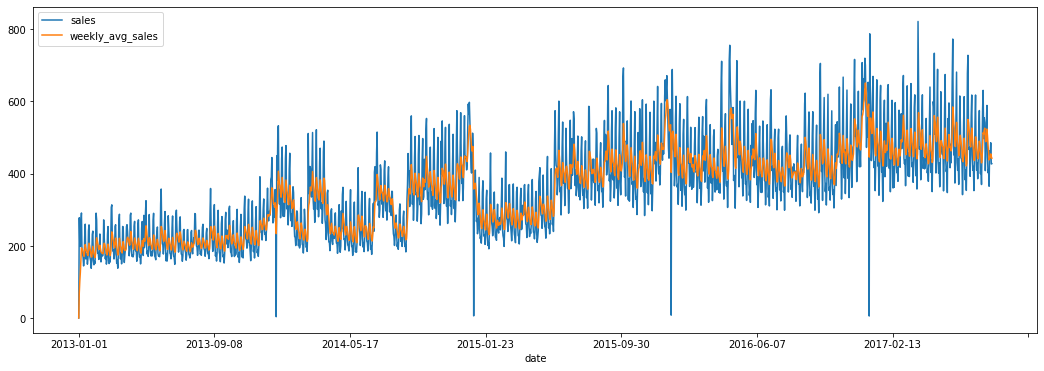

In [19]:
#Reading the csv for examining the sales variation wrt weekly average sales over time
train_data = pd.read_csv(path+'train.csv')

avg_sales = train_data.groupby('date').agg({'sales': 'mean'}).reset_index()
avg_sales['weekly_avg_sales'] = avg_sales['sales'].ewm(span=7, adjust=False).mean()
avg_sales.plot(x= 'date', y= ['sales', 'weekly_avg_sales'], figsize=(18,6))

<AxesSubplot:xlabel='date'>

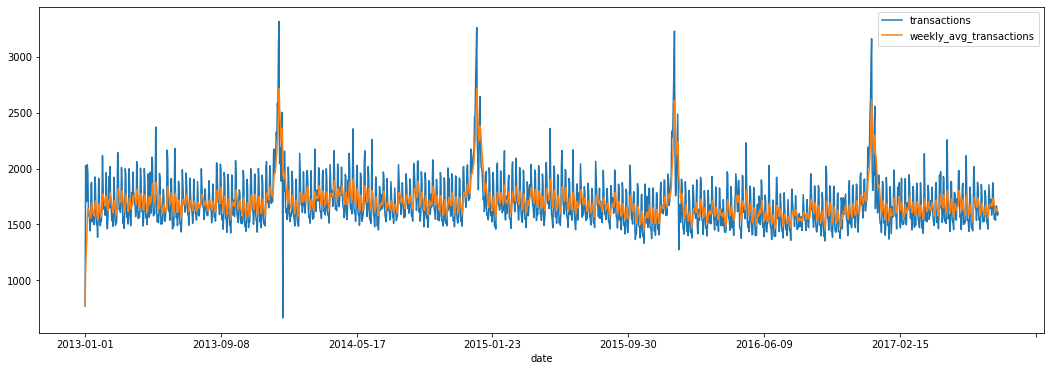

In [20]:
#Reading the csv for examining the transaction vs weekly avg transactions over time
data_trans = pd.read_csv(path+'transactions.csv')

avg_transactions = data_trans.groupby('date').agg({'transactions': 'mean'}).reset_index()
avg_transactions['weekly_avg_transactions'] = avg_transactions['transactions'].ewm(span=7, adjust=False).mean()
avg_transactions.plot(x= 'date', y= ['transactions', 'weekly_avg_transactions'], figsize=(18,6))

#### Trying to find the relationship between sales, transaction and oil prices

In [21]:
sales_transaction = pd.DataFrame()
sales_transaction['sales'] = avg_sales['sales']
sales_transaction['transacions'] = avg_transactions['transactions']
sales_transaction['oil'] = data_oil['dcoilwtico']
sales_transaction.corr()

,sales,transacions,oil
sales,1.000000,0.180532,-0.500805
transacions,0.180532,1.000000,0.043190
oil,-0.500805,0.043190,1.000000


###### Hence we can infer from the above matrix, that the relationship between sales and transaction is weak. Whereas, the relationship between oil and sales is strong